In [1]:
import pandas as pd

In [16]:
tweets = pd.read_csv("/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lab2/src/tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [3]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie"in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

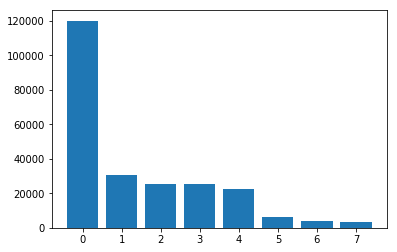

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [5]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts)

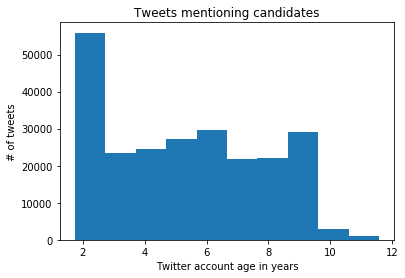

In [6]:
from datetime import datetime
tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])
tweets["user_age"] = tweets["user_created"].apply(lambda x:(datetime.now()-x).total_seconds()/3600/24/365)
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


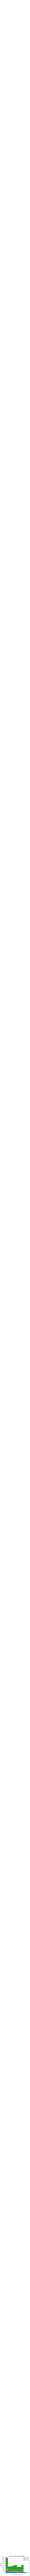

In [7]:
clinton_tweets = tweets["user_age"][tweets["candidate"]=="clinton"]
sanders_tweets = tweets["user_age"][tweets["candidate"]=="sanders"]
trump_tweets = tweets["user_age"][tweets["candidate"]=="trump"]
plt.hist([clinton_tweets,sanders_tweets,trump_tweets],stacked = True,
       label = ["clinton","sanders","trump"])
plt.legend()
plt.title("tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate("More Trump tweets",xy=(1,35000),xytext = (2,35000),arrowprops=dict(facecolor='black'))
plt.show()

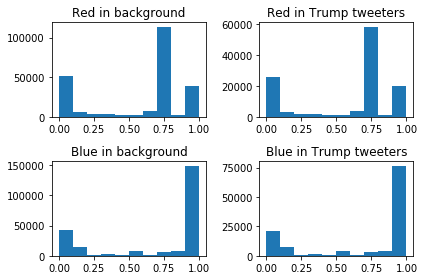

In [8]:
import matplotlib.colors as colors
tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])
fig,axes = plt.subplots(nrows=2,ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
ax0.hist(tweets["red"])
ax0.set_title("Red in background")

ax1.hist(tweets["red"][tweets["candidate"]=="trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title("Blue in background")

ax3.hist(tweets["blue"][tweets["candidate"]=="trump"].values)
ax3.set_title("Blue in Trump tweeters")

plt.tight_layout()
plt.show()

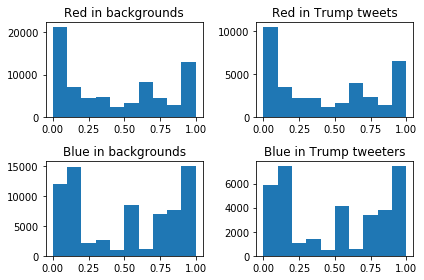

In [9]:
tweets["user_bg_color"].value_counts()
tc = tweets[~tweets["user_bg_color"].isin(['C0DEED','000000','F5F8FA'])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

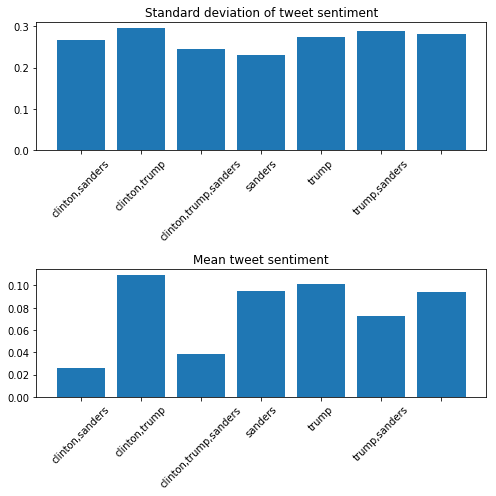

In [10]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()


In [11]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

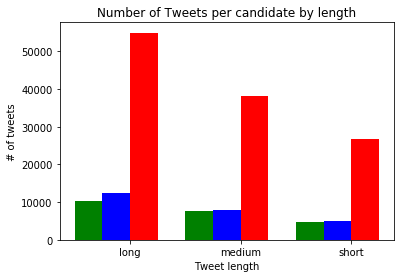

In [12]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()



In [15]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia',
          'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts',
          'Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
          'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
          'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia',
          'Wisconsin','Wyoming','al','ak','az','ar','ca','co','ct','de','fl','ga','hi','id','il','in','ia','ks',
          'ky','la','me','md','ma','mi','mn','ms','mo','mt','ne','nv','nh','nj','nm','ny','nc','nd','oh','ok','or',
          'pa','ri','sc','sd','tn','tx','ut','vt','va','wa','wv','wi','wy'
]
states_lower=[]
for state in states:
    states_lower.append(state.lower())
print(states_lower)

['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming', 'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']


In [18]:
def get_state(row):
    state = []
    text = str(row["user_location"]).lower()
    if "alabama" in text or "al" in text:
        state.append("alabama")
    if "alaska" in text or "ak" in text:
        state.append("alaska")
    if "arizona" in text or "az"in text:
        state.append("arizona")
    if "arkansas" in text or "ar"in text:
        state.append("arkansas")
    if "california" in text or "ca"in text:
        state.append("california")
    if "colorado" in text or "co"in text:
        state.append("colorado")
    if "connecticut" in text or "ct"in text:
        state.append("connecticut")
    if "delaware" in text or "de"in text:
        state.append("delaware")
    if "florida" in text or "fl"in text:
        state.append("florida")
    if "georgia" in text or "ga"in text:
        state.append("georgia")
    if "hawaii" in text or "hi"in text:
        state.append("arizona")
    if "idaho" in text or "id"in text:
        state.append("idaho")
    if "illinois" in text or "il"in text:
        state.append("illinois")
    if "indiana" in text or "in"in text:
        state.append("indiana")
    if "iowa" in text or "ia"in text:
        state.append("iowa")
    if "kansas" in text or "ks"in text:
        state.append("kansas")
    if "kentucky" in text or "ky"in text:
        state.append("ky")
    if "louisiana" in text or "la"in text:
        state.append("louisiana")
    if "maine" in text or "me"in text:
        state.append("maine")
    if "maryland" in text or "md"in text:
        state.append("maryland")
    if "massachusetts" in text or "ma"in text:
        state.append("massachusetts")
    if "michigan" in text or "mi"in text:
        state.append("michigan")
    if "minnesota" in text or "mn" in text:
        state.append("minnesota")
    if "mississippi" in text or "ms"in text:
        state.append("mississipii")
    if "missouri" in text or "mo"in text:
        state.append("missouri")
    if "montana" in text or "mt"in text:
        state.append("montana")
    if "nebraska" in text or "ne"in text:
        state.append("nebraska")

    if "nevada" in text or "nv"in text:
        state.append("nevada")
    if "new hampshire" in text or "nh"in text:
        state.append("new hampshire")
    if "new jersey" in text or "nj"in text:
        state.append("new jersey")
    if "new mexico" in text or "nm"in text:
        state.append("new mexico")
    if "new york" in text or "ny"in text:
        state.append("new york")
    if "north carolina" in text or "nc"in text:
        state.append("north carolina")
    if "north dakota" in text or "nd"in text:
        state.append("north dakota")
    if "ohio" in text or "oh"in text:
        state.append("ohio")
    if "oklahoma" in text or "ok"in text:
        state.append("oklahoma")
    if "oregon" in text or 'or' in text:
        state.append('oregon')
    if "pennsylvania" in text or "pa"in text:
        state.append("pennsylvania")
    if "rhode island" in text or "ri"in text:
        state.append("rhode island")
    if "south carolina" in text or "sc"in text:
        state.append("south carolina")
    if "south dakota" in text or "sd"in text:
        state.append("south dakota")
    if "tennessee" in text or "tn"in text:
        state.append("tennesse")
    if "texas" in text or 'tx' in text:
        state.append("texas")
    if "utah" in text or "ut"in text:
        state.append("utah")
    if "vermont" in text or "vt"in text:
        state.append("vermont")
    if "virginia" in text or "va"in text:
        state.append("virginia")
    if "washington" in text or "wa"in text:
        state.append("washington")
    if "west virginia" in text or "wv"in text:
        state.append("west virginia")
    if "wisconsin" in text or 'wi' in text:
        state.append('wisconsin')
    if "wyoming" in text or "wy"in text:
        state.append("wyoming")        
    return ",".join(state)

tweets["state"] = tweets.apply(get_state,axis=1)

Other possible strategies are to inference state location using geographical co-ordinates and also compile data using cities and use some api to possibly check if it falls within any of the US states. Another possible strategy is to use hashtags to add data to the users for which location is missing

In [19]:
print(tweets['state'].count())

237480


We were able to classify 237480 tweets with above written classifier